In [1]:
import numpy as np
import math
from tqdm.notebook import tqdm
from functools import cache
import copy

import heapq

import matplotlib.pyplot as plt


In [2]:
with open("input_day_21.txt") as f:
    text = f.read()

num_steps = 64

test = False
if test:
    text = r"""
...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
"""
    num_steps = 6

num_steps

text = text.strip()


In [3]:
G_strs = text.split("\n")
R = len(G_strs)
C = len(G_strs[0])

G = []
for r_i, r_str in enumerate(G_strs):
    G.append([])
    for c in range(len(r_str)):
        if r_str[c] == "S":
            start = (r_i, c)
        G[-1].append(r_str[c])

print(R, C)

131 131


In [4]:
def estimated_dist_from_start(state): 
    # actually a lower bound
    pos = state[0]
    return abs(pos[0] - start[0]) + abs(pos[1] - start[1])


In [5]:
min_G_dists = [[999999999 for c in range(C)] for r in range(R)]

print(len(G), len(G[0]), len(min_G_dists), len(min_G_dists[0]))


q = []
heapq.heapify(q) # don't think this does anything?

# position, number of steps from start
first_state = (start, 0)
heapq.heappush(q, (estimated_dist_from_start(first_state), first_state))

while len(q) > 0:

    est, current_state = heapq.heappop(q)
    pos, dist = current_state

    if min_G_dists[pos[0]][pos[1]] <= dist:
        continue
    min_G_dists[pos[0]][pos[1]] = dist

    for d in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        next_pos = (pos[0] + d[0], pos[1] + d[1])
        if not ((0 <= next_pos[0] < R) and (0 <= next_pos[1] < C)):
            continue
        if G[next_pos[0]][next_pos[1]] == "#":
            continue

        next_state = (next_pos, dist + 1)
        heapq.heappush(q, (estimated_dist_from_start(next_state), next_state))

start_parity = (start[0] + start[1]) % 2

tot = 0
for r in range(R):
    for c in range(C):
        if min_G_dists[r][c] <= num_steps:
            if (r + c) % 2 == start_parity:
                tot += 1


print("part 1:", tot)


131 131 131 131
part 1: 3858


In [6]:
num_repeating = 20
big_G = []
for r in range(R * num_repeating):
    big_G.append([])
    for c in range(C * num_repeating):
        if G[r % R][c % C] == "S":
            big_G[-1].append(".")
        else:
            big_G[-1].append(G[r % R][c % C])
big_start = (start[0] + R * (num_repeating//2), start[1] + C * (num_repeating//2))
big_G[big_start[0]][big_start[1]] = "S"


In [7]:
def estimated_dist_from_big_start(state): 
    # actually a lower bound
    pos = state[0]
    return abs(pos[0] - big_start[0]) + abs(pos[1] - big_start[1])


In [8]:
#for row in big_G:
#    print("".join(str(_) for _ in row))
    

In [9]:
min_G_dists = [[99_999_999 for c in range(C * num_repeating)] for r in range(R * num_repeating)]

print(len(big_G), len(big_G[0]), len(min_G_dists), len(min_G_dists[0]))

q = []
heapq.heapify(q) # don't think this does anything?

# position, number of steps from start
first_state = (big_start, 0)
heapq.heappush(q, (estimated_dist_from_big_start(first_state), first_state))

while len(q) > 0:

    est, current_state = heapq.heappop(q)

    pos, dist = current_state

    if min_G_dists[pos[0]][pos[1]] <= dist:
        continue
    min_G_dists[pos[0]][pos[1]] = dist

    for d in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        next_pos = (pos[0] + d[0], pos[1] + d[1])
        if not ((0 <= next_pos[0] < R * num_repeating) and (0 <= next_pos[1] < C * num_repeating)):
            continue
        if big_G[next_pos[0]][next_pos[1]] == "#":
            continue

        next_state = (next_pos, dist + 1)
        heapq.heappush(q, (estimated_dist_from_big_start(next_state), next_state))




2620 2620 2620 2620


In [10]:
# counting numbers of reachable points at each step

big_start_parity = (big_start[0] + big_start[1]) % 2

full_counts = np.zeros(5000)
ones = np.ones(2000)
for r in range(R * num_repeating):
    for c in range(C * num_repeating):
        curr_min_steps = min_G_dists[r][c]

        if (r + c) % 2 == (big_start_parity + curr_min_steps) % 2:
            full_counts[curr_min_steps::2] += 1
        else:
            full_counts[curr_min_steps+1::2] += 1

        """
        for i in range(len(full_counts)):
            if curr_min_steps <= i:
                if (r + c) % 2 == (big_start_parity + i) % 2:
                    full_counts[i] += 1
        """


In [31]:
desired_num = 26501365

cycle_frequency = 330 - 199
cycle_start_loc = 199

desired_phase = (desired_num - cycle_start_loc) % cycle_frequency
desired_cycle_num = (desired_num - 199) // cycle_frequency
print(desired_phase, desired_cycle_num)


128 202298


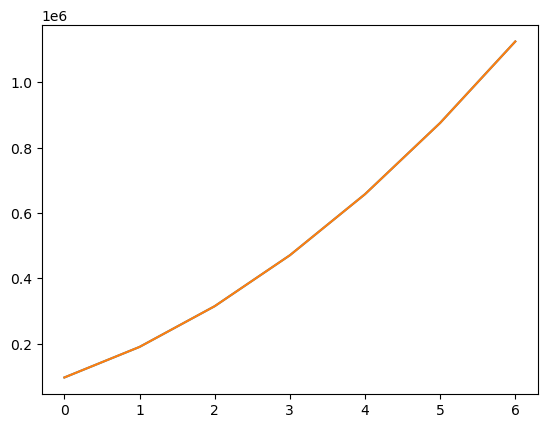

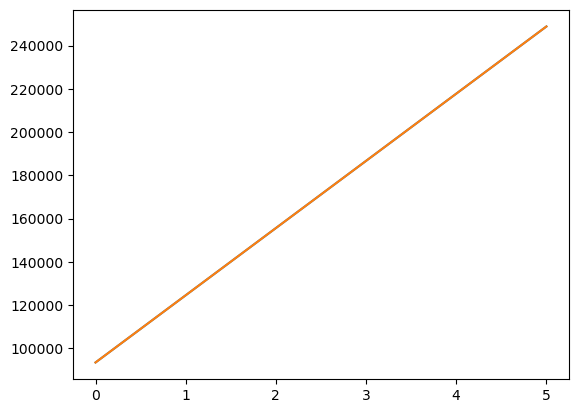

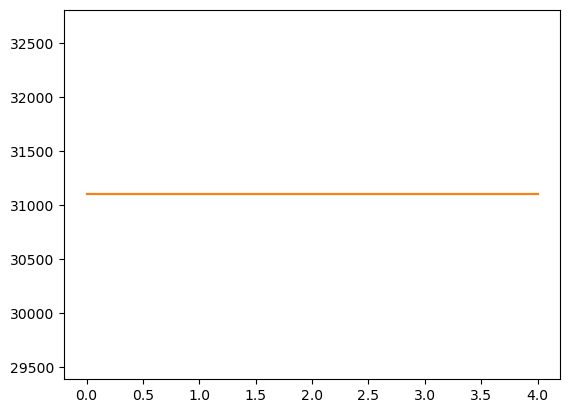

0.0
31098.0
[  97407.  190786.  315263.  470838.  657511.  875282. 1124151.] [  97407.  190786.  315263.  470838.  657511.  875282. 1124151.]
636350496972143.0


In [32]:
counts_progression = np.array(full_counts[cycle_start_loc + desired_phase : : cycle_frequency])[:7]
diffs = counts_progression[1:] - counts_progression[:-1]
diff2s = diffs[1:] - diffs[:-1]

def hand_constructed_counts(cycle_num):
    return counts_progression[0] + 31098 / 2 * cycle_num**2 + 77830 * cycle_num

hand_prog = np.array([hand_constructed_counts(x) for x in range(7)])
hand_prog_diffs = hand_prog[1:] - hand_prog[:-1]
hand_prog_diff2s = hand_prog_diffs[1:] - hand_prog_diffs[:-1]

plt.plot(counts_progression)
plt.plot(hand_prog)
plt.show()

plt.plot(diffs)
plt.plot(hand_prog_diffs)
plt.show()

plt.plot(diff2s)
plt.plot(hand_prog_diff2s)
plt.show()

print(diffs[0] - hand_prog_diffs[0])

print(diff2s[0])

print(counts_progression, hand_prog)

print(hand_constructed_counts(desired_cycle_num))


In [20]:
# 636356965749455 too high
# 636363079316407 too high
# 636350496972143 correct

31098.0

In [13]:
print(1/0)

ZeroDivisionError: division by zero

(array([47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  1.09,  1.18,  1.27,  1.36,  1.45,  1.54,  1.63,  1.72,
         1.81,  1.9 ,  1.99,  2.08,  2.17,  2.26,  2.35,  2.44,  2.53,
         2.62,  2.71,  2.8 ,  2.89,  2.98,  3.07,  3.16,  3.25,  3.34,
         3.43,  3.52,  3.61,  3.7 ,  3.79,  3.88,  3.97,  4.06,  4.15,
         4.24,  4.33,  4.42,  4.51,  4.6 ,  4.69,  4.78,  4.87,  4.96,
         5.05,  5.14,  5.23,  5.32,  5.41,  5.5 ,  5.59,  5.68,  5.77,
        

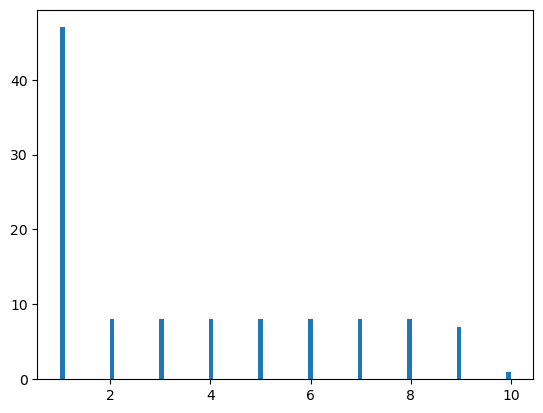

In [ ]:
# counting frequencies of unique blocks

counts = {}

for big_r_i in range(num_repeating):
    for big_c_i in range(num_repeating):
        pattern = []
        for row in min_G_dists[R * big_r_i : R * (big_r_i + 1)]:
            pattern += row[C * big_c_i : C * (big_c_i + 1)]
        pattern = tuple(pattern)
        if pattern in counts:
            counts[pattern] += 1
        else:
            counts[pattern] = 1

#for k, v in counts.items():
#    print(v)

plt.hist(counts.values(), bins=100)

In [ ]:
for x in [6, 10, 50, 100, 500]:#, 1000, 5000]:
    print(x, full_counts[x])

6 47.0
10 114.0
50 2340.0
100 9288.0
500 227487.0


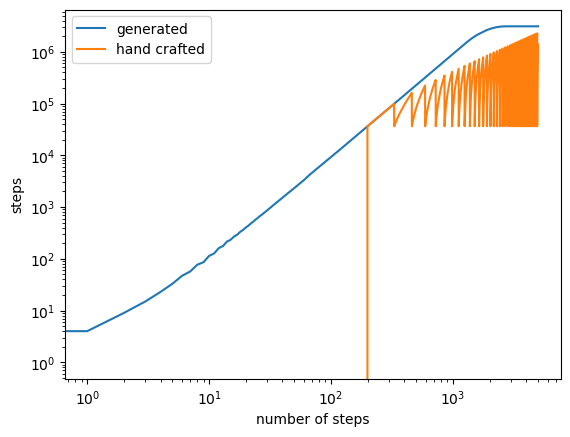

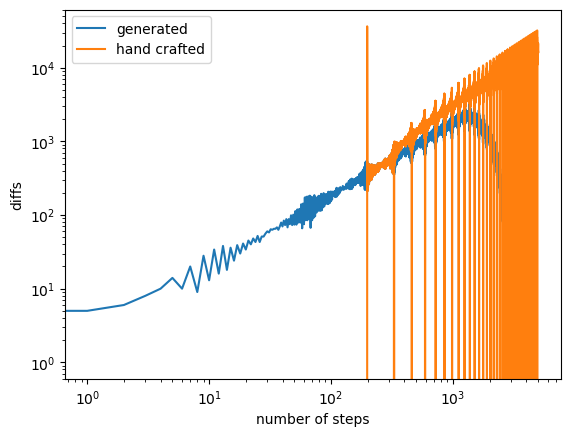

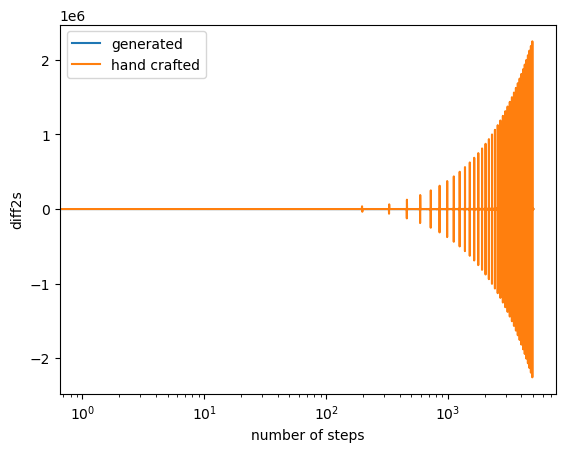

In [ ]:
from scipy.optimize import curve_fit

def quad(x, a, b):
    return a * (x - b)**2

popt, pcov = curve_fit(quad, range(1000)[100:300], full_counts[100:300])

def approximation(x):
    return quad(x, *popt)


def hand_crafted_fit(x):

    if x < 199:
        return 0
    
    start_base = full_counts[199]

    phase = (x - 199) % (330 - 199)
    cycle_num = (x - 199) // (330 - 199)

    fine_structure = full_counts[199:330][phase] - start_base - phase

    #return start_base + (330 - 199) * cycle_num**2 + fine_structure
    return start_base + (fine_structure + phase) * (cycle_num + 1)


generated_x = np.array(range(len(full_counts)))
diffs_x = np.array(range(len(full_counts)-1))
diff2s_x = np.array(range(len(full_counts)-2))
generated_diffs = np.array(full_counts[1:]) - np.array(full_counts[:-1])
generated_diff2s = generated_diffs[1:] - generated_diffs[:-1]

approx_x = np.array(range(5000))
approx = approximation(approx_x)
hand_crafted = [hand_crafted_fit(x) for x in approx_x]
hand_crafted_diffs = np.array(hand_crafted[1:]) - np.array(hand_crafted[:-1])
hand_crafted_diff2s = hand_crafted_diffs[1:] - hand_crafted_diffs[:-1]

plt.figure()
plt.plot(full_counts, label="generated")
plt.plot(hand_crafted, label="hand crafted")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("steps")
plt.show()

plt.figure()
plt.plot(generated_diffs, label="generated")
plt.plot(hand_crafted_diffs, label="hand crafted")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diffs")
plt.show()

plt.figure()
plt.plot(generated_diff2s, label="generated")
plt.plot(hand_crafted_diff2s, label="hand crafted")
plt.xscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diff2s")
plt.show()


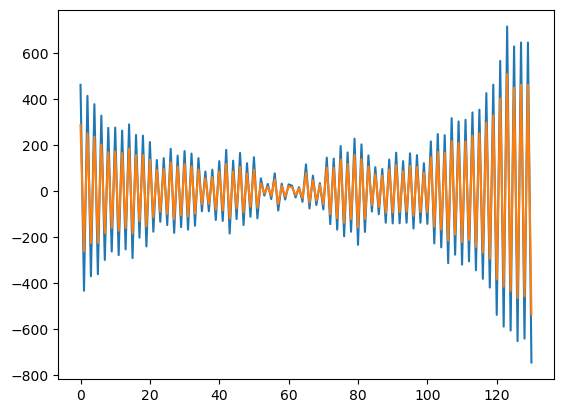

In [ ]:
plt.plot(generated_diff2s[199 + (330-199) : 330 + (330-199)])
plt.plot(generated_diff2s[199:330])

In [ ]:
generated_diff2s[199 + (330-199)] / generated_diff2s[199], generated_diff2s[199 + (330-199)] - generated_diff2s[199]

(1.6153846153846154, 176.0)

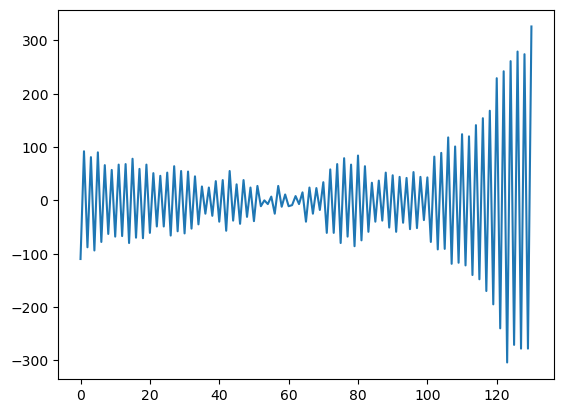

In [ ]:
plt.plot(generated_diff2s[199 + (330-199) : 330 + (330-199)] - 2*generated_diff2s[199:330])

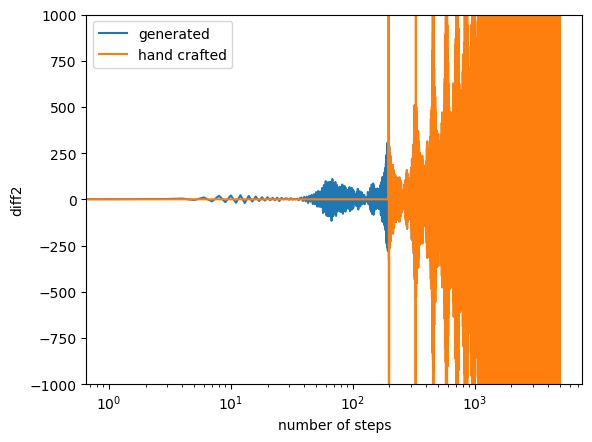

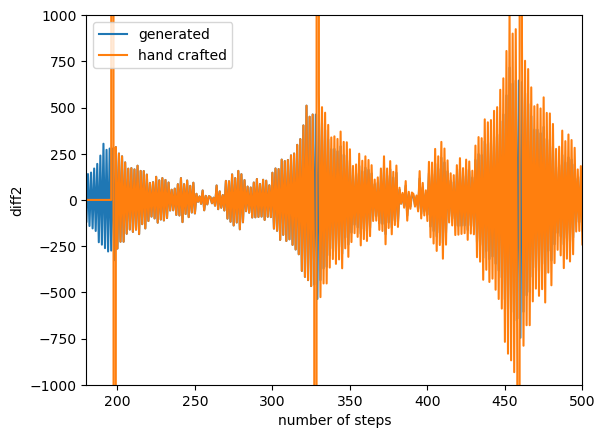

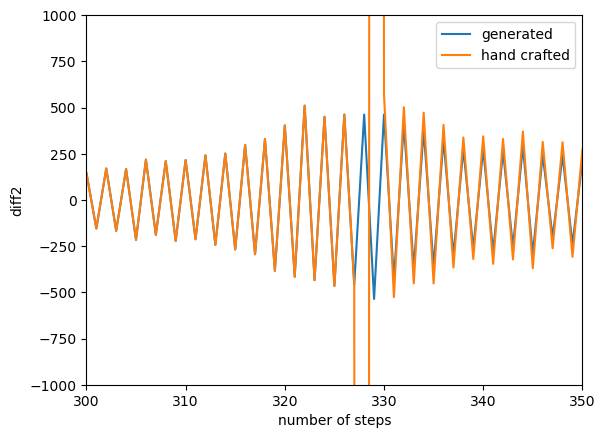

In [ ]:
plt.figure()
plt.plot(generated_diff2s, label="generated")
plt.plot(hand_crafted_diff2s, label="hand crafted")
plt.xscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diff2")
plt.ylim(-1000, 1000)
plt.show()

plt.figure()
plt.plot(generated_diff2s, label="generated")
plt.plot(hand_crafted_diff2s, label="hand crafted")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diff2")
plt.xlim(180, 500)
plt.ylim(-1000, 1000)
plt.show()

plt.figure()
plt.plot(generated_diff2s, label="generated")
plt.plot(hand_crafted_diff2s, label="hand crafted")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diff2")
plt.xlim(300, 350)
plt.ylim(-1000, 1000)
plt.show()


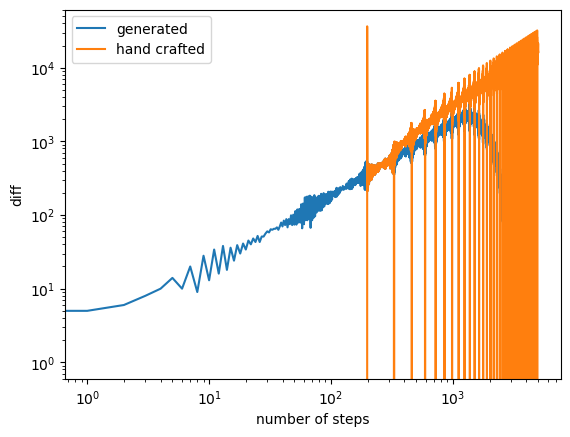

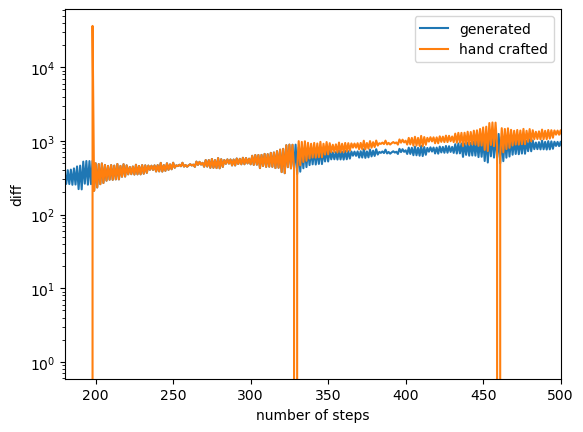

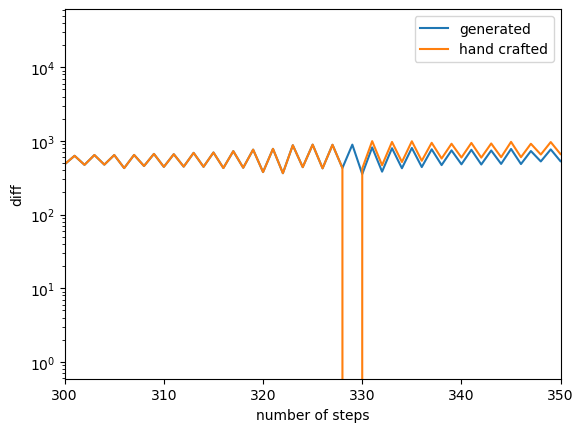

-262.0

In [ ]:
plt.figure()
plt.plot(generated_diffs, label="generated")
plt.plot(hand_crafted_diffs, label="hand crafted")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diff")
plt.show()

plt.figure()
plt.plot(generated_diffs, label="generated")
plt.plot(hand_crafted_diffs, label="hand crafted")
plt.yscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diff")
plt.xlim(180, 500)
plt.show()

plt.figure()
plt.plot(generated_diffs, label="generated")
plt.plot(hand_crafted_diffs, label="hand crafted")
plt.yscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("diff")
plt.xlim(300, 350)
plt.show()

generated_diffs[400] - hand_crafted_diffs[400]



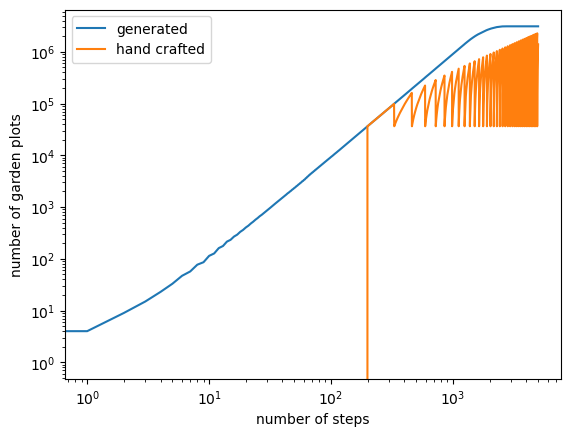

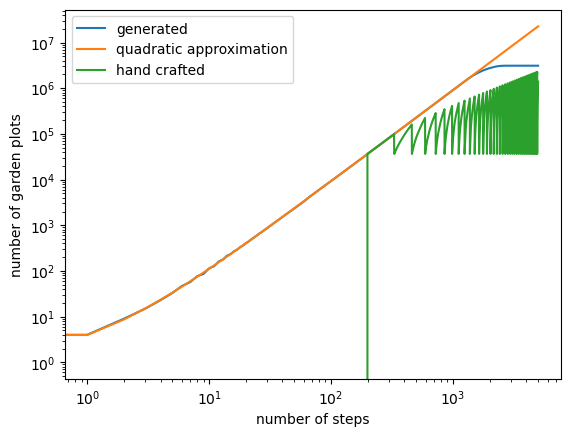

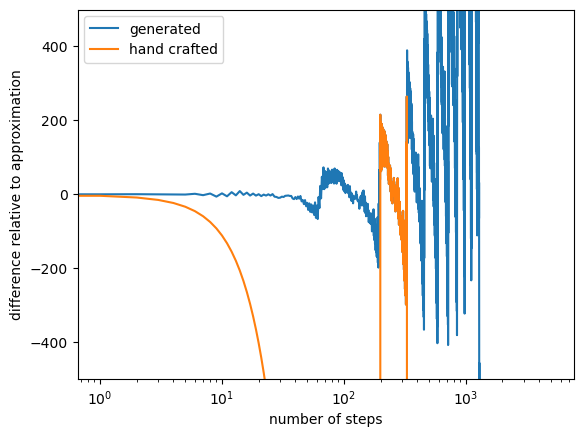

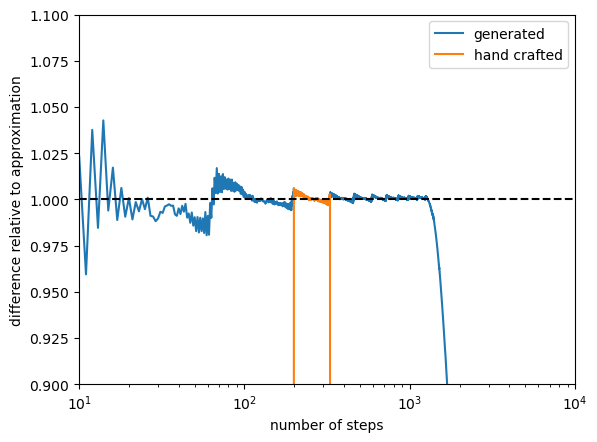

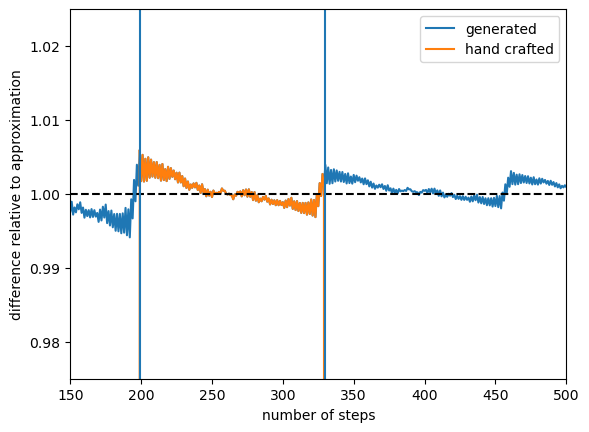

frequency: 131


'\nplt.figure()\nplt.plot(generated_x, full_counts_over_approx, label="generated")\nplt.axhline(1, ls="--", c="k")\nplt.xlabel("number of steps")\nplt.ylabel("difference relative to approximation")\nplt.legend()\nplt.xlim(175, 225)\nplt.ylim(0.975, 1.025)\nplt.axvline(199)\nplt.show()\n\nplt.figure()\nplt.plot(generated_x, full_counts_over_approx, label="generated")\nplt.axhline(1, ls="--", c="k")\nplt.xlabel("number of steps")\nplt.ylabel("difference relative to approximation")\nplt.legend()\nplt.xlim(300, 350)\nplt.ylim(0.975, 1.025)\nplt.axvline(330)\nplt.show()\n'

In [ ]:
plt.figure()
plt.plot(full_counts, label="generated")
plt.plot(hand_crafted, label="hand crafted")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("number of garden plots")
plt.show()

full_counts_minus_approx = full_counts - approximation(generated_x)
hand_crafted_minus_approx = hand_crafted - approximation(generated_x)

full_counts_over_approx = full_counts / approximation(generated_x)
hand_crafted_over_approx = hand_crafted / approximation(generated_x)


plt.figure()
plt.plot(full_counts, label="generated")
plt.plot(approx_x, approx, label="quadratic approximation")
plt.plot(approx_x, hand_crafted, label="hand crafted")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("number of steps")
plt.ylabel("number of garden plots")
plt.show()


plt.figure()
plt.plot(generated_x, full_counts_minus_approx, label="generated")
plt.plot(generated_x, hand_crafted_minus_approx, label="hand crafted")
plt.xscale("log")
plt.xlabel("number of steps")
plt.ylabel("difference relative to approximation")
plt.legend()
plt.ylim(-500, 500)
plt.show()

plt.figure()
plt.plot(generated_x, full_counts_over_approx, label="generated")
plt.plot(generated_x, hand_crafted_over_approx, label="hand crafted")
plt.axhline(1, ls="--", c="k")
plt.xscale("log")
plt.xlabel("number of steps")
plt.ylabel("difference relative to approximation")
plt.legend()
plt.xlim(10, 1e4)
plt.ylim(0.9, 1.1)
plt.show()


plt.figure()
plt.plot(generated_x, full_counts_over_approx, label="generated")
plt.plot(generated_x, hand_crafted_over_approx, label="hand crafted")
plt.axhline(1, ls="--", c="k")
plt.xlabel("number of steps")
plt.ylabel("difference relative to approximation")
plt.legend()
plt.xlim(150, 500)
plt.ylim(0.975, 1.025)
plt.axvline(199)
plt.axvline(330)
plt.show()

print("frequency:", 330 - 199)

"""
plt.figure()
plt.plot(generated_x, full_counts_over_approx, label="generated")
plt.axhline(1, ls="--", c="k")
plt.xlabel("number of steps")
plt.ylabel("difference relative to approximation")
plt.legend()
plt.xlim(175, 225)
plt.ylim(0.975, 1.025)
plt.axvline(199)
plt.show()

plt.figure()
plt.plot(generated_x, full_counts_over_approx, label="generated")
plt.axhline(1, ls="--", c="k")
plt.xlabel("number of steps")
plt.ylabel("difference relative to approximation")
plt.legend()
plt.xlim(300, 350)
plt.ylim(0.975, 1.025)
plt.axvline(330)
plt.show()
"""

In [ ]:
if test:

    known_x = np.array([6, 10, 50, 100, 500, 1000, 5000])
    known = np.array([16, 50, 1594, 6536, 167004, 668697, 16733044])

    from scipy.optimize import curve_fit

    def quad(x, a, b):
        return a * (x - b)**2

    def quad_known_phase(x, a):
        return a * (x - 2)**2

    #popt, pcov = curve_fit(quad, known_x[-3:], known[-3:])
    #popt, pcov = curve_fit(quad, np.array(range(1000))[:100], full_counts[:100])
    #popt_known_phase, pcov = curve_fit(quad_known_phase, np.array(range(1000))[:100], full_counts[:100])
    popt, pcov = curve_fit(quad, list(np.array(range(1000))[50:55]) + list(known_x[-3:]), list(full_counts[50:55]) + list(known[-3:]))

    print(popt)
    #print(popt_known_phase, 2)

    popt = (0.66947797, 0.5833123)
    popt = (0.66947797, 0.8)

    def approximation(x):
        #return quad(x, 0.68477588, 2)
        return quad(x, *popt)
        #return quad_known_phase(x, *popt_known_phase)

    generated_x = np.array(range(len(full_counts)))

    approx_x = np.array(range(5000))
    approx = approximation(approx_x)

    known_minus_approx = known - approximation(known_x)
    full_counts_minus_approx = full_counts - approximation(generated_x)

    known_over_approx = known / approximation(known_x)
    full_counts_over_approx = full_counts / approximation(generated_x)


    plt.figure()
    plt.plot(full_counts, label="generated")
    plt.scatter(known_x, known, label="truth")
    plt.plot(approx_x, approx, label="quadratic approximation")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.xlabel("number of steps")
    plt.ylabel("number of garden plots")
    plt.show()


    plt.figure()
    plt.plot(generated_x, full_counts_minus_approx, label="generated")
    plt.scatter(known_x, known_minus_approx, label="truth")
    plt.xscale("log")
    plt.xlabel("number of steps")
    plt.ylabel("difference relative to approximation")
    plt.legend()
    plt.ylim(-200, 200)
    plt.show()

    plt.figure()
    plt.plot(generated_x, full_counts_over_approx, label="generated")
    plt.scatter(known_x, known_over_approx, label="truth")
    plt.axhline(1, ls="--", c="k")
    plt.xscale("log")
    plt.xlabel("number of steps")
    plt.ylabel("difference relative to approximation")
    plt.legend()
    plt.xlim(10, 1e4)
    plt.ylim(0.9, 1.1)
    plt.show()


    plt.figure()
    plt.plot(generated_x, full_counts_over_approx, label="generated")
    plt.scatter(known_x, known_over_approx, label="truth")
    plt.axhline(1, ls="--", c="k")
    plt.xlabel("number of steps")
    plt.ylabel("difference relative to approximation")
    plt.legend()
    plt.xlim(100, 150)
    plt.ylim(0.975, 1.025)
    plt.axvline(119)
    plt.axvline(130)
    plt.show()

    # frequency = 11



In [ ]:
"""step_parity = num_steps % 2
tot_dic = {6:0, 
           10:0,
           50:0,
           100:0,
           500:0,
           1000:0,
           5000:0,
           }

for r in range(R * num_repeating):
    for c in range(C * num_repeating):
        curr_min_steps = min_G_dists[r][c]
        for goal_steps in tot_dic:
            if curr_min_steps <= goal_steps:
                
                if (r + c) % 2 == (big_start_parity + step_parity) % 2:
                    tot_dic[goal_steps] += 1

for k,v in tot_dic.items():
    print(k, v)
    """

'step_parity = num_steps % 2\ntot_dic = {6:0, \n           10:0,\n           50:0,\n           100:0,\n           500:0,\n           1000:0,\n           5000:0,\n           }\n\nfor r in range(R * num_repeating):\n    for c in range(C * num_repeating):\n        curr_min_steps = min_G_dists[r][c]\n        for goal_steps in tot_dic:\n            if curr_min_steps <= goal_steps:\n                \n                if (r + c) % 2 == (big_start_parity + step_parity) % 2:\n                    tot_dic[goal_steps] += 1\n\nfor k,v in tot_dic.items():\n    print(k, v)\n    '

In [ ]:
#for row in min_G_dists:
#    print("".join(str(_).ljust(5) for _ in row))
    

In [ ]:
"""curr_coverages = [[0 for c in range(C)] for r in range(R)]
total_covered = 0

i = 0
while True:
    i += 1
    if i % 1000 == 1: # only looking at odd
        

"""

'curr_coverages = [[0 for c in range(C)] for r in range(R)]\ntotal_covered = 0\n\ni = 0\nwhile True:\n    i += 1\n    if i % 1000 == 1: # only looking at odd\n        \n\n'